In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
main_df = pd.read_csv("water_potability.csv")
df = main_df.copy()

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [38]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [39]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [40]:
X = scaler.fit_transform(X)


In [41]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [45]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [46]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [47]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6284658040665434


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [50]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [51]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [52]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6451016635859519


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [55]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [56]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [57]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6284658040665434


In [58]:
!pip install xgboost

You should consider upgrading via the 'c:\users\sakshee\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [59]:
from xgboost import XGBClassifier

In [60]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [61]:
# Training Model
model_xgb.fit(X_train, y_train)

[20:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=125, n_jobs=5, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6709796672828097


In [63]:
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.6534195933456562


In [64]:
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6885397412199631


In [65]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)
model_ada.fit(X_train, y_train)
# Making Prediction
pred_ada = model_ada.predict(X_test)
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.634011090573013


,Model,Accuracy_score
5,SVM,0.688540
3,XGBoost,0.670980
4,KNeighbours,0.653420
1,Decision Tree,0.645102
6,AdaBoost,0.634011
0,Logistic Regression,0.628466
2,Random Forest,0.628466


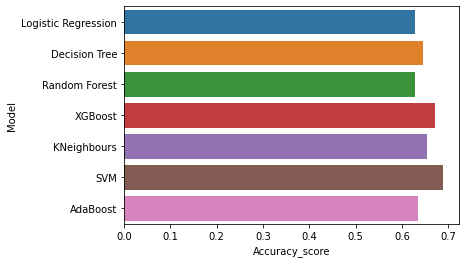

In [66]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [68]:
pd.to_pickle(sv,'sv.pickle')
